In [1]:
library("ggplot2")
library("dplyr")
install.packages("ggsci")
library("ggsci")
library("repr")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union





The downloaded binary packages are in
	/var/folders/hm/wn0bpy0j7vl2q9gqnhhccpph0000gn/T//RtmpESOXRv/downloaded_packages


In [22]:
path_data <- "../FRBDX/Labs-FRBDX.csv"
all_institutes <- read.csv(path_data, stringsAsFactors = F)
#all_institutes <- read.csv("../combined_data/Labs-Combined200401.csv", stringsAsFactors = F)

In [23]:
loinc_mapping <- read.csv("../fakedata/loinc_mapping_long.csv", stringsAsFactors = F)
names(loinc_mapping) <- tolower(names(loinc_mapping))

In [24]:
loinc_mapping["plot_names_units"] <- paste0(loinc_mapping$plot_name, " (", loinc_mapping$units, ")")

In [25]:
all_institutes <- dplyr::left_join(all_institutes, loinc_mapping, by="loinc")
all_institutes <- all_institutes[order(all_institutes$days_since_positive),] %>%
    filter(num_patients >= 1)

In [26]:
ggplot2::theme_set(
    theme_bw() +
    theme(plot.title = element_text(size=20, hjust = 0.5),
         axis.title.x = element_text(size=14),
         axis.title.y = element_text(size=14),
         axis.text.x = element_text(size=11),
         axis.text.y = element_text(size=11),
         strip.text = element_text(size=11),
         legend.title = element_text(size=13),
        legend.text = element_text(size=12))
)

## Setting plot size in Jupyter
options(repr.plot.width=12, repr.plot.height=6)

# All measures

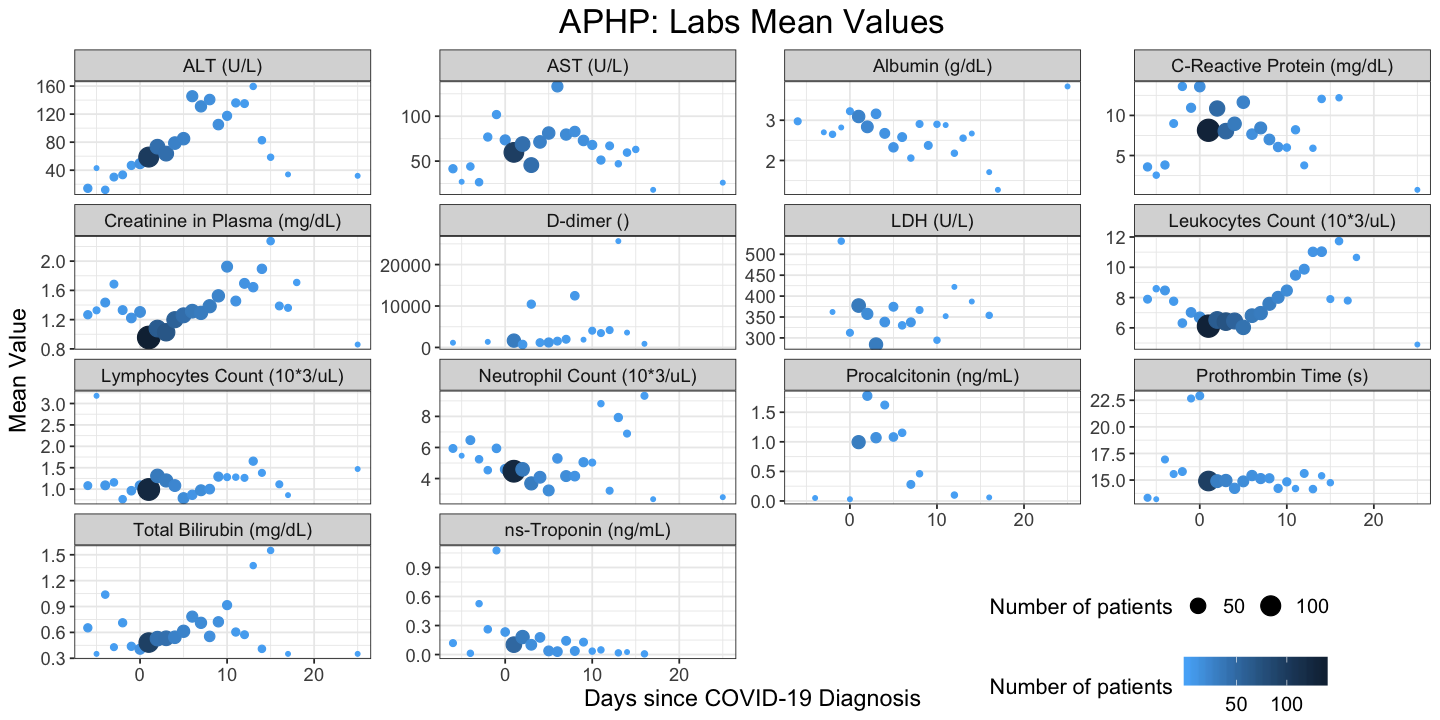

In [33]:
ggplot(data=all_institutes, aes_string(x="days_since_positive", y="mean_value")) +
geom_point(aes_string(
    col="num_patients",
    size="num_patients")
) +
facet_wrap("plot_names_units", scales="free_y") +
labs(title = "APHP: Labs Mean Values",
     x = "Days since COVID-19 Diagnosis",
     y = "Mean Value",
     col = "Number of patients",
    size = "Number of patients") +
scale_colour_gradient(high = "#132B43", low = "#56B1F7") +
scale_fill_continuous(low = "#132B43", high = "#56B1F7") +
theme(
    legend.position = c(0.8, 0.01),
    legend.direction = "horizontal")
#ggsave("labs_combined200403_aphp.png", height=14, width=32, unit="cm")

# Labs grouped into categories

In [30]:
hepatic_panel <- c("ALT", "AST", "Albumin", "Total Bilirubin", "Prothrombin Time")
white_blood_cells <- c("Leukocytes Count", "Lymphocytes Count", "Neutrophil Count")
systemic_response <- c("C-Reactive Protein", "D-dimer", "Procalcitonin", "LDH")

In [31]:
hepatic_subset <- all_institutes[all_institutes$plot_name %in% hepatic_panel,]
white_blood_cells_subset <- all_institutes[all_institutes$plot_name %in% white_blood_cells,]
systemic_response_subset <- all_institutes[all_institutes$plot_name %in% systemic_response,]

## Liver Function Panel

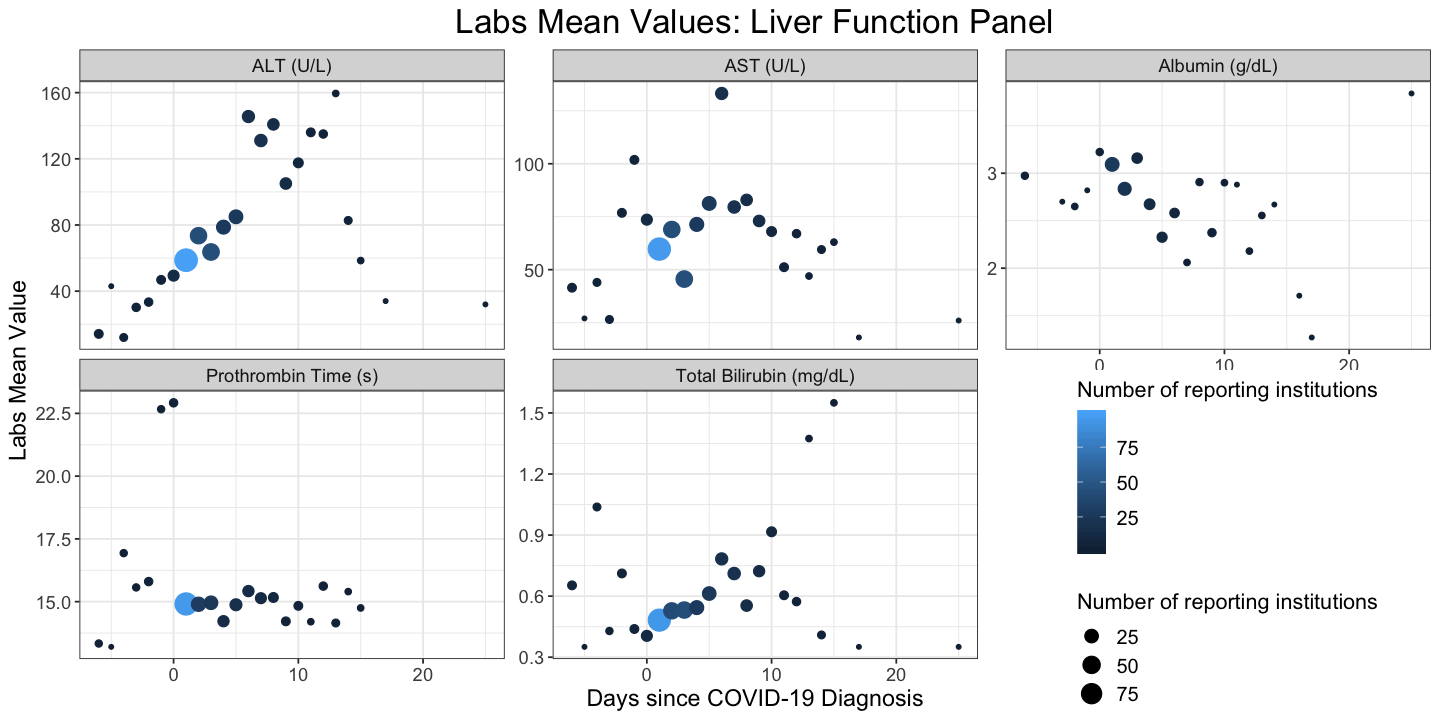

In [35]:
ggplot(data=hepatic_subset, aes_string(x="days_since_positive", y="mean_value")) +
geom_point(aes_string(col="num_patients",
                     size="num_patients")) +
facet_wrap("plot_names_units", scales="free_y") +
labs(title = "Labs Mean Values: Liver Function Panel",
     x = "Days since COVID-19 Diagnosis",
     y = "Labs Mean Value",
    col = "Number of Patients", 
     size = "Number of Patients"
    ) + 
theme(
    legend.position = c(0.85, 0.2),
    )
#ggsave("labs_liver200403_aphp.png", height=14, width=32, unit="cm")

Warning message:
“Removed 17 rows containing missing values (geom_errorbar).”
Warning message:
“Removed 17 rows containing missing values (geom_errorbar).”


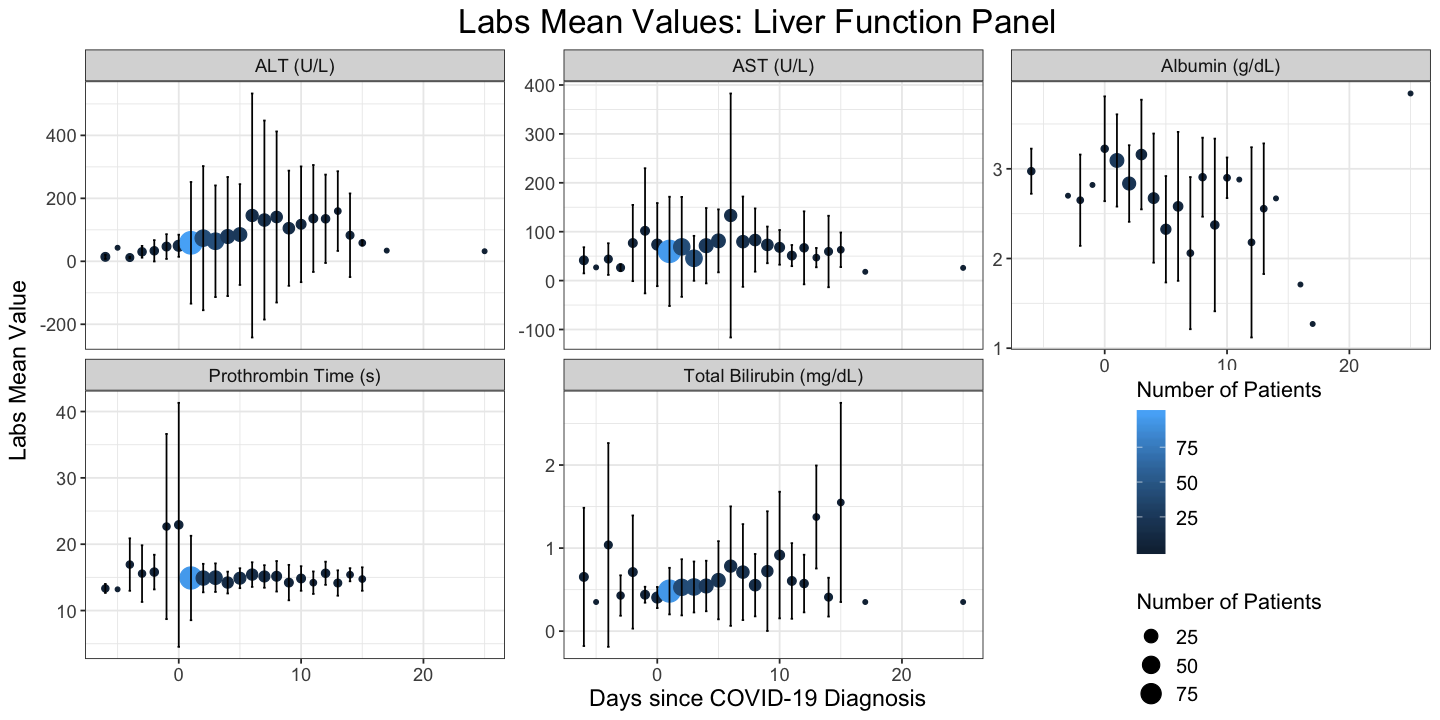

In [36]:
ggplot(data=hepatic_subset, aes_string(x="days_since_positive", y="mean_value")) +
geom_point(aes_string(col="num_patients", size="num_patients")) +
geom_errorbar(aes(ymin=mean_value-stdev_value, ymax=mean_value+stdev_value), width=.2,
                 position=position_dodge(.9)) + 
facet_wrap("plot_names_units", scales="free_y") +
labs(title = "Labs Mean Values: Liver Function Panel",
     x = "Days since COVID-19 Diagnosis",
     y = "Labs Mean Value",
    col = "Number of Patients", 
     size = "Number of Patients"
    ) + 
theme(
    legend.position = c(0.85, 0.2),
    )
#ggsave("labs_liver_sd_200403_aphp.png", height=14, width=32, unit="cm")

## White Blood Cells

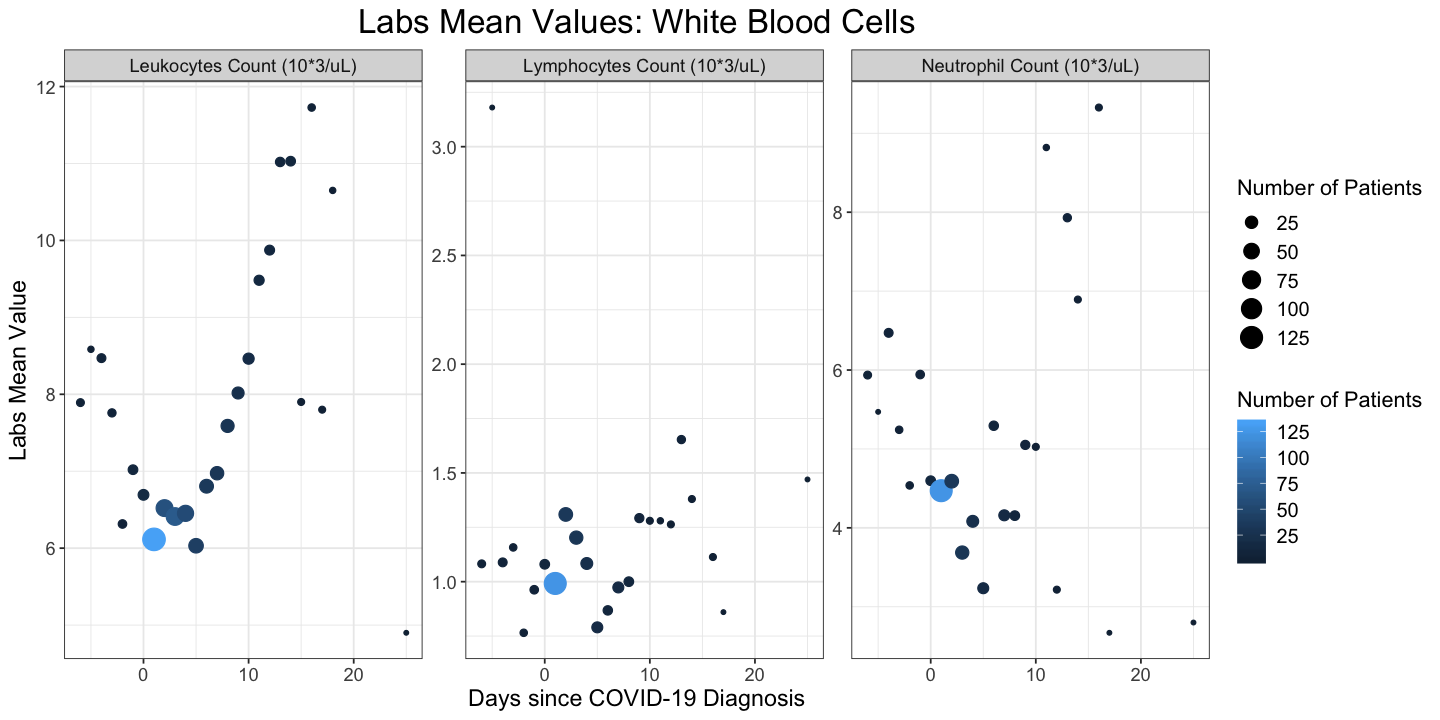

In [40]:
ggplot(data=white_blood_cells_subset, aes_string(x="days_since_positive", y="mean_value")) +
geom_point(aes_string(col="num_patients", size="num_patients")) +
#geom_errorbar(aes(ymin=mean_value-stdev_value, ymax=mean_value+stdev_value), width=.2,
#                 position=position_dodge(.9)) + 
facet_wrap("plot_names_units", scales="free_y") +
labs(title = "Labs Mean Values: White Blood Cells",
     x = "Days since COVID-19 Diagnosis",
     y = "Labs Mean Value",
     col = "Number of Patients", 
     size = "Number of Patients")
#ggsave("labs_whiteb200403_aphp.png", height=14, width=32, unit="cm")    

## Systemic Response

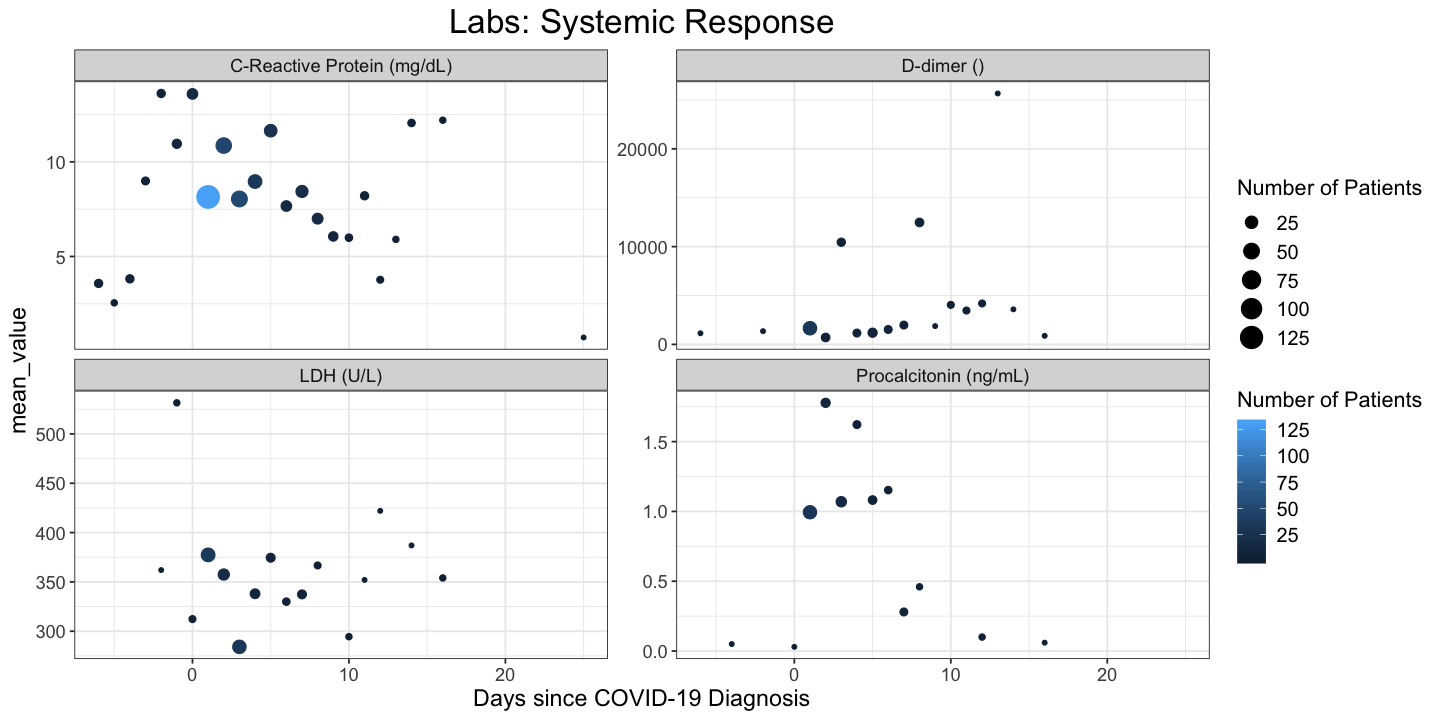

In [43]:
ggplot(data=systemic_response_subset, aes_string(x="days_since_positive", y="mean_value")) +
 geom_point(aes_string(col="num_patients", size="num_patients")) +
#geom_errorbar(aes(ymin=MEAN_VALUE-STDEV_VALUE, ymax=MEAN_VALUE+STDEV_VALUE), width=.2,
#                 position=position_dodge(.9)) + 
facet_wrap("plot_names_units", scales="free_y") +
labs(title = "Labs: Systemic Response",
     x = "Days since COVID-19 Diagnosis",
     col = "Number of Patients", 
     size = "Number of Patients"
    ) 
#ggsave("labs_systemic200403.png", height=14, width=28, unit="cm")

## Albumin

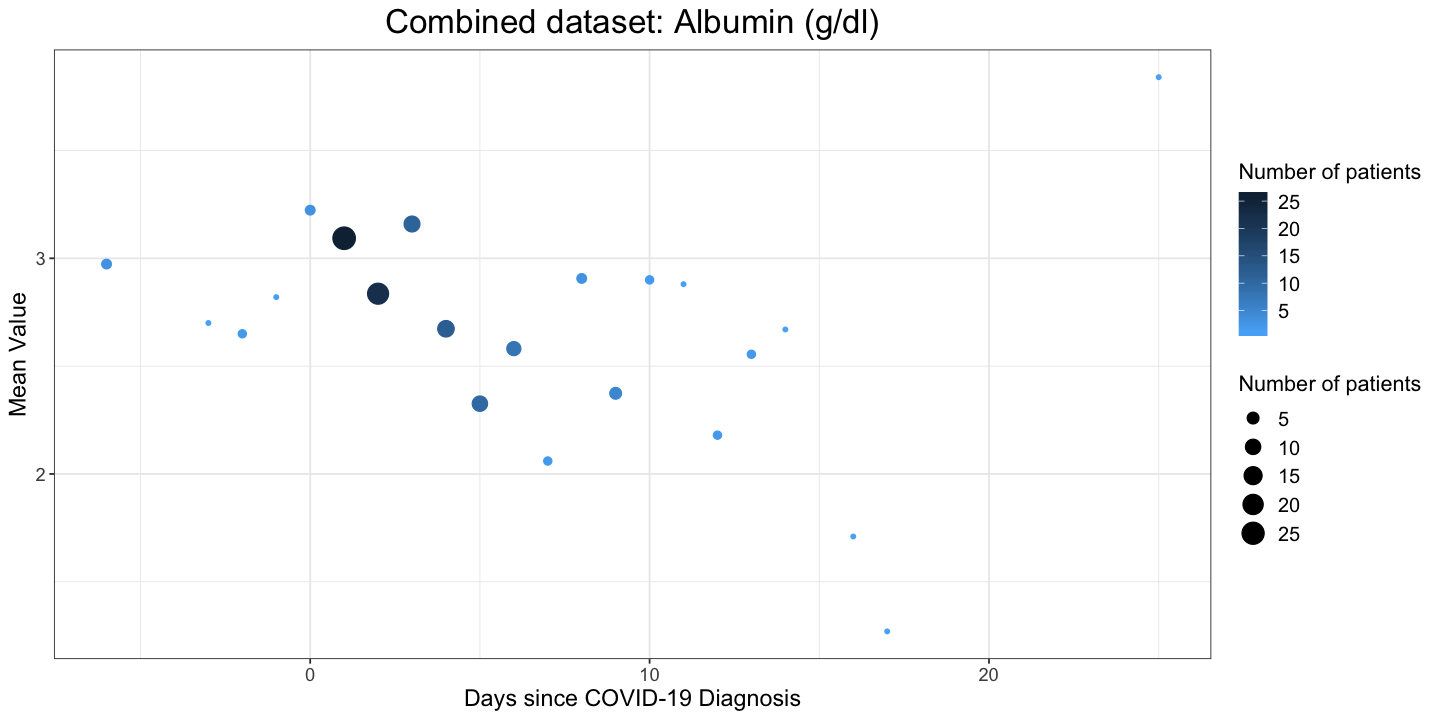

In [53]:
ggplot(data=all_institutes[all_institutes$test=="albumin",], aes_string(x="days_since_positive", y="mean_value")) +
geom_point(aes_string(
    col="num_patients",
                      size="num_patients")
          , 
          ) +
scale_colour_gradient(high = "#132B43", low = "#56B1F7") +
#geom_line(aes_string(col="siteid")) +
labs(title = "Combined dataset: Albumin (g/dl)",
     x = "Days since COVID-19 Diagnosis",
     y = "Mean Value",
     size = "Number of patients",
    col = "Number of patients")
#ggsave("albumin_200403.png", height=14, width=32, unit="cm")

# Creatinine

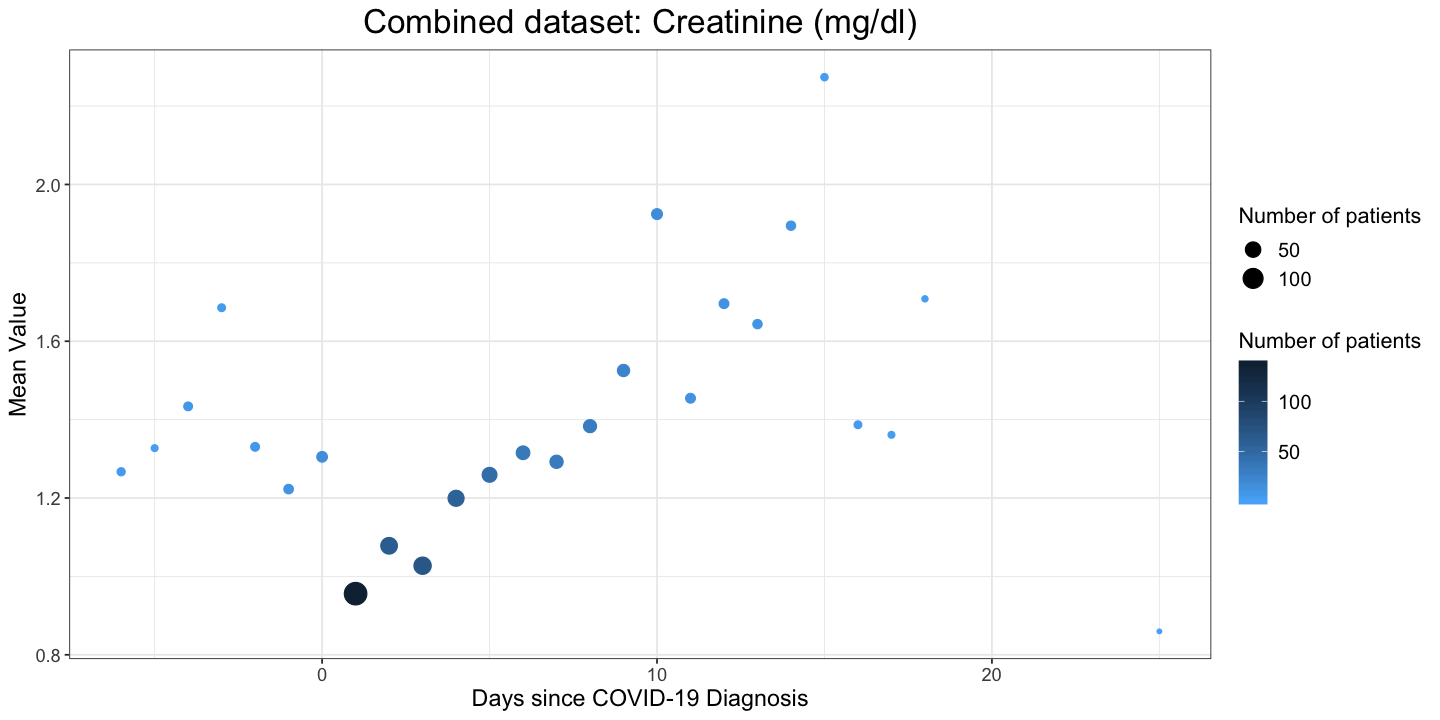

In [52]:
ggplot(data=all_institutes[all_institutes$test=="creatinine",], aes_string(x="days_since_positive", y="mean_value")) +
geom_point(aes_string(
    col="num_patients",
                      size="num_patients")
          ) +
labs(title = "Combined dataset: Creatinine (mg/dl)",
     x = "Days since COVID-19 Diagnosis",
     y = "Mean Value",
     size = "Number of patients",
    col = "Number of patients") +
scale_colour_gradient(high = "#132B43", low = "#56B1F7") 
#ggsave("creatinine_200402.png", height=14, width=32, unit="cm")